<h3 align="center">
  Trabajo final de curso para 'Introducción a las técnicas inteligentes de resolución de problemas de planificación, secuenciación y ejecución': 'Análisis de vegetación y agua en el Embalse Los Molinos para el 18/08/2023'.

  Maestría en Aplicaciones de Información Espacial (MAIE)

  Rodrigo José Chani
  
  -2024-
</h3>

### Introducción

Este notebook presenta un análisis detallado del Embalse Los Molinos utilizando imágenes satelitales Landsat 8 del 18/08/2023. El enfoque principal es calcular y analizar dos índices clave: el Índice de Vegetación de Diferencia Normalizada (NDVI) y el Índice de Agua de Diferencia Normalizada Modificado (MNDWI).

**Objetivos específicos:**
- **NDVI (Normalized Difference Vegetation Index)**: Este índice ayuda a identificar y cuantificar la vegetación en la zona, proporcionando una medida de la biomasa activa. El NDVI es especialmente útil para monitorear cambios en la vegetación a lo largo del tiempo, lo que puede indicar cambios en la salud del ecosistema.
- **MNDWI (Modified Normalized Difference Water Index)**: Utilizado para realzar las características del agua frente a las de tierra y vegetación, el MNDWI es esencial para la gestión de recursos hídricos y la planificación ambiental.

Ambos índices se utilizan para evaluar la salud ecológica del embalse, y los resultados pueden influir en las decisiones de gestión y conservación de este importante recurso hídrico.

### Metodología

Este análisis se lleva a cabo siguiendo estos pasos principales:
1. **Pre-procesamiento de datos**: Carga y preparación de bandas espectrales necesarias.
2. **Cálculo de índices**: Implementación de funciones para calcular NDVI y MNDWI.
3. **Visualización parcial**: Generación de mapas de índices para visualizar la distribución espacial de la vegetación y el agua.
4. **Análisis estadístico**: Evaluación cuantitativa de los índices para una mejor interpretación de los resultados.
5. **Post-procesamiento de datos**: Generación de máscaras para aislar los cuerpos de agua.
6. **Visualización final de resultados**: Generación de mapas de de los cuerpos de agua para visualizar la distribución espacial de la vegetación y el agua.

### 1. **Pre-procesamiento de datos: exploración de datos**

Antes de proceder con el análisis y el cálculo de los índices NDVI y MNDWI, es necesario preparar el entorno de trabajo y cargar las bandas espectrales desde los archivos comprimidos. A continuación, se describe el código utilizado para estas tareas iniciales.

#### Función `unzip_files`

Esta función se encarga de descomprimir el archivo ZIP que contiene las imágenes satelitales. Es importante asegurarse de que el archivo ZIP esté en la ubicación especificada antes de ejecutar la función.

- **Argumentos**:
  - `zip_path`: Ruta al archivo ZIP.
  - `extract_to`: Directorio de destino donde se extraerán los archivos.

#### Función `load_band`

Una vez descomprimidas las imágenes, utilizamos esta función para cargar individualmente cada banda necesaria para los cálculos de NDVI y MNDWI. Esta función abre el archivo de la banda, lee los datos y devuelve la matriz de píxeles junto con los metadatos asociados.

- **Argumentos**:
  - `path`: Ruta al archivo de la banda (por ejemplo, un archivo .tif).

#### Descompresión del archivo ZIP

Primero, descomprimimos el archivo ZIP que contiene las imágenes crudas. Esto se realiza mediante la función `unzip_files` que utiliza la biblioteca `zipfile` para extraer todos los archivos en una carpeta específica. Asegúrate de que el archivo ZIP esté en la ubicación especificada antes de ejecutar esta función.

#### Carga de las bandas de imágenes

Luego, cargamos las bandas individuales de las imágenes descomprimidas. Utilizamos `rasterio` para abrir cada archivo de imagen y leer los datos de las bandas. Esta función abre el archivo de la banda, lee los datos y devuelve la matriz de píxeles junto con los metadatos asociados.

#### Obtención de metadatos de las imágenes

Finalmente, obtenemos y mostramos los metadatos de cada una de las bandas de imágenes. Para ello, definimos una función que abre cada archivo de imagen con `rasterio` y lee sus metadatos, los cuales se imprimen en la consola.

#### Visualización de histogramas

Para entender mejor la distribución de los valores de píxeles en cada banda, generamos histogramas y anotamos los metadatos directamente en los gráficos. Cada banda se representa con un color específico en el histograma:

- **Banda Roja**: Color rojo.
- **Banda NIR**: Color rojo oscuro.
- **Banda Verde**: Color verde.
- **Banda SWIR**: Color marrón.

#### Exploración de datos

Se usa la función `calculate_statistics` para calcular las estadísticas descriptivas de cada imagen y así poder dilucidar sobre las características de cada banda. Se imprimen los datos resultantes.

#### Imagen RGB cruda

Se usa la función `calculate_statistics` para calcular las estadísticas descriptivas de cada imagen y así poder dilucidar sobre las características de cada banda. Se imprimen los datos resultantes.

No se encontró el archivo: ./Los-Molinos_2023-08-18_8_all_bands.zip.
Bandas cargadas correctamente.


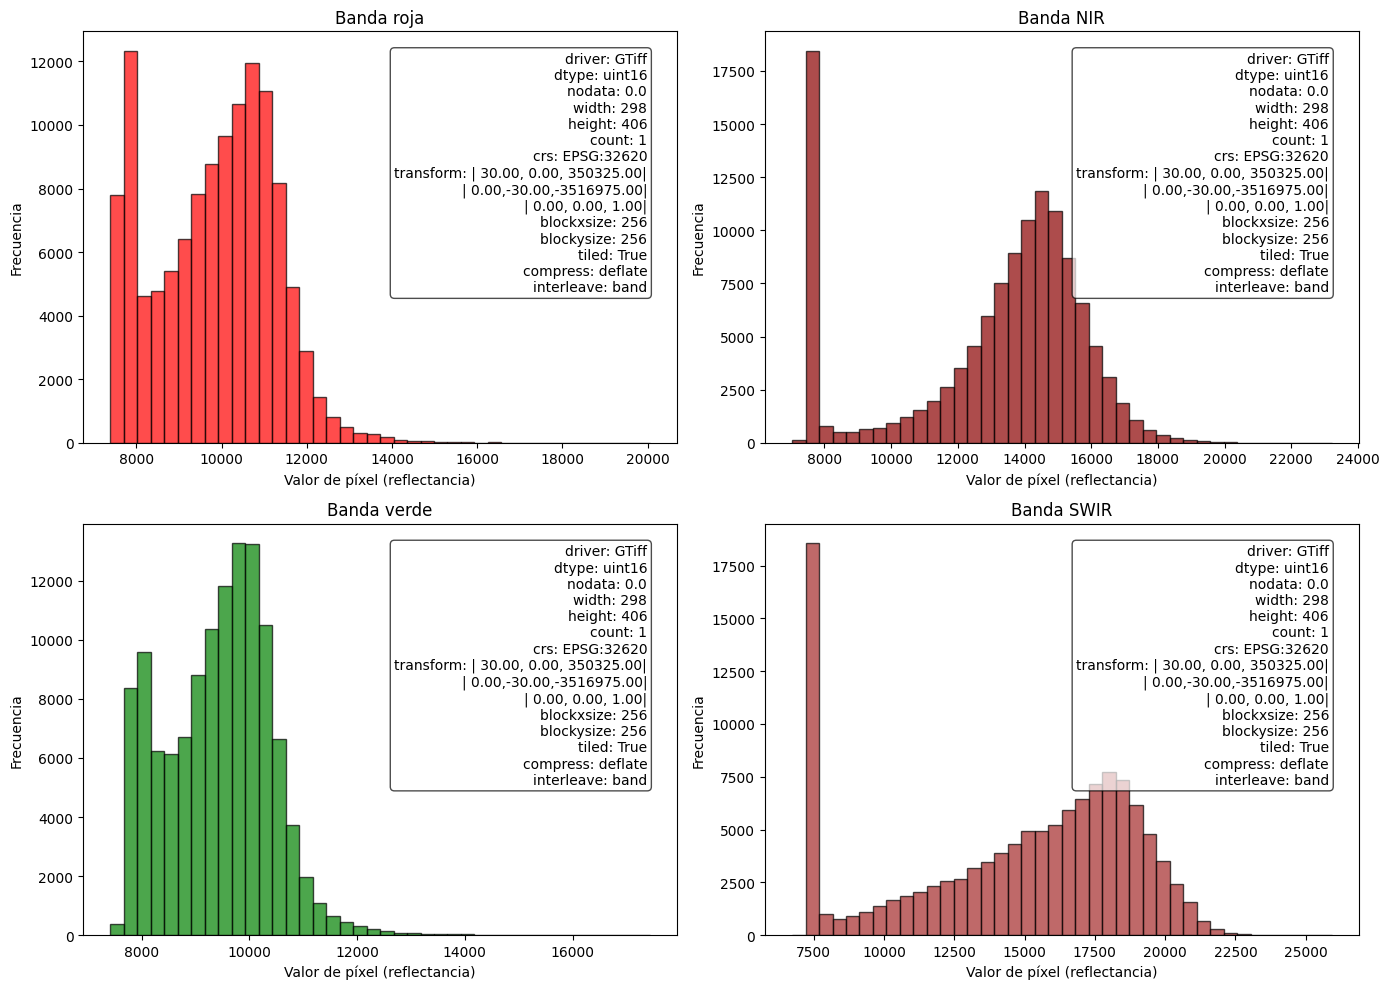

Estadísticas antes del filtrado:
Estadísticas para Red Band:
Media: 9841.64
Desviación Estándar: 1387.16
Mínimo: 7384.00
Máximo: 20052.00
-------------------------
Estadísticas para NIR Band:
Media: 13047.86
Desviación Estándar: 2873.55
Mínimo: 7028.00
Máximo: 23214.00
-------------------------
Estadísticas para Green Band:
Media: 9408.94
Desviación Estándar: 970.28
Mínimo: 7415.00
Máximo: 17435.00
-------------------------
Estadísticas para SWIR Band:
Media: 14691.10
Desviación Estándar: 4176.35
Mínimo: 6728.00
Máximo: 25928.00
-------------------------


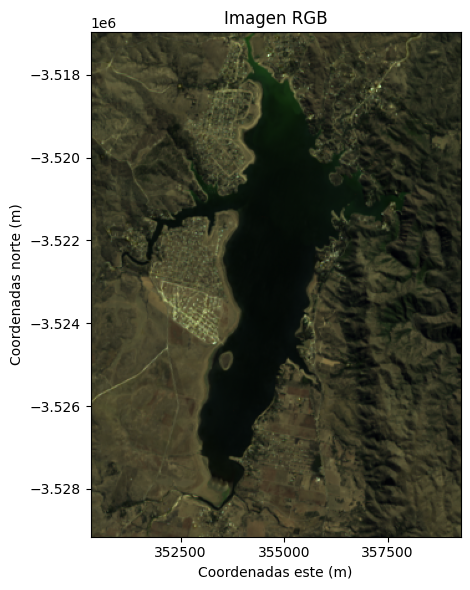

In [256]:
import zipfile
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

def unzip_files(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

def load_band(path):
    with rasterio.open(path) as src:
        return src.read(1), src.profile

# Nombre del archivo ZIP a descomprimir
zip_name = 'Los-Molinos_2023-08-18_8_all_bands.zip'
zip_path = './' + zip_name
extract_to = './Imagenes_Landsat'  # Carpeta donde se extraerán los archivos

# Intenta descomprimir el archivo ZIP
try:
    unzip_files(zip_path, extract_to)
    print("Archivo descomprimido correctamente.")
except FileNotFoundError:
    print(f"No se encontró el archivo: {zip_path}.")

# Rutas a las bandas descomprimidas
red_band_path = extract_to + '/2023-08-18.SR_B4.tif'
nir_band_path = extract_to + '/2023-08-18.SR_B5.tif'
green_band_path = extract_to + '/2023-08-18.SR_B3.tif'
blue_band_path = extract_to + '/2023-08-18.SR_B2.tif'
swir_band_path = extract_to + '/2023-08-18.SR_B6.tif'

# Intenta cargar bandas solo si la descompresión fue exitosa
try:
    red_band, profile_red = load_band(red_band_path)
    nir_band, profile_nir = load_band(nir_band_path)
    green_band, profile_green = load_band(green_band_path)
    swir_band, profile_swir = load_band(swir_band_path)
    blue_band, profile_blue = load_band(blue_band_path)
    print("Bandas cargadas correctamente.")
except Exception as e:
    print(f"Error al cargar bandas: {e}")

# Función para imprimir los metadatos en el gráfico
def annotate_metadata(ax, profile):
    metadata_str = '\n'.join([f'{key}: {value}' for key, value in profile.items()])
    ax.annotate(metadata_str, xy=(0.95, 0.95), xycoords='axes fraction', fontsize=10,
                bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white", alpha=0.7),
                verticalalignment='top', horizontalalignment='right')

# Lista de archivos de imagen y perfiles a investigar
bands = [(red_band, profile_red, 'Banda roja'),
         (nir_band, profile_nir, 'Banda NIR'),
         (green_band, profile_green, 'Banda verde'),
         (swir_band, profile_swir, 'Banda SWIR')]

# Diccionario de colores para cada banda
band_colors = {
    'Banda roja': 'red',
    'Banda NIR': 'darkred',
    'Banda verde': 'green',
    'Banda SWIR': 'brown'
}

# Generar histogramas
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for (band, profile, title), ax in zip(bands, axes.flatten()):
    color = band_colors[title]
    ax.hist(band.flatten(), bins=40, color=color, edgecolor='black', alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel('Valor de píxel (reflectancia)')
    ax.set_ylabel('Frecuencia')
    annotate_metadata(ax, profile)

plt.tight_layout()
plt.show()

# Calcular estadísticas antes y después del filtrado
def calculate_statistics(data, label):
    mean = np.nanmean(data)
    std = np.nanstd(data)
    min_val = np.nanmin(data)
    max_val = np.nanmax(data)
    print(f'Estadísticas para {label}:')
    print(f'Media: {mean:.2f}')
    print(f'Desviación Estándar: {std:.2f}')
    print(f'Mínimo: {min_val:.2f}')
    print(f'Máximo: {max_val:.2f}')
    print('-------------------------')

print('Estadísticas antes del filtrado:')
calculate_statistics(red_band, 'Red Band')
calculate_statistics(nir_band, 'NIR Band')
calculate_statistics(green_band, 'Green Band')
calculate_statistics(swir_band, 'SWIR Band')

# Normalizar las bandas entre 0 y 1 para visualización RGB
def normalize_band(band):
    band_min, band_max = band.min(), band.max()
    return (band - band_min) / (band_max - band_min)

red_band_normalized = normalize_band(red_band)
green_band_normalized = normalize_band(green_band)
blue_band_normalized = normalize_band(blue_band)

# Apilar las bandas en una imagen RGB
rgb_image = np.dstack((red_band_normalized, green_band_normalized, blue_band_normalized))

# Obtener la transformación y CRS para la visualización
with rasterio.open(red_band_path) as src:
    transform = src.transform

# Visualizar la imagen RGB
fig, ax = plt.subplots(figsize=(7,6))

rgb_image_display = ax.imshow(rgb_image, extent=(transform[2], transform[2] + rgb_image.shape[1] * transform[0], transform[5] + rgb_image.shape[0] * transform[4], transform[5]))
ax.set_title('Imagen RGB', color='black')
ax.set_xlabel('Coordenadas este (m)')
ax.set_ylabel('Coordenadas norte (m)')
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))  # Ajustar número de divisiones del eje x

plt.tight_layout()
plt.show()

### 1. **Pre-procesamiento de datos: eliminación de outliers**:

#### Extracción de outliers

Para mejorar la calidad de los datos y asegurar análisis precisos, es fundamental remover los valores atípicos (outliers) que puedan afectar los resultados. Utilizamos una técnica basada en el rango intercuartil (IQR) para identificar y eliminar estos outliers. 

- **Función `remove_outliers`**:
  - Calcula el primer cuartil (Q1) y el tercer cuartil (Q3) de los datos.
  - Calcula el rango intercuartil (IQR) como `Q3 - Q1`.
  - Define los límites inferior y superior como `Q1 - 1.5 * IQR` y `Q3 + 1.5 * IQR`, respectivamente.
  - Filtra los datos para incluir solo los valores dentro de estos límites.

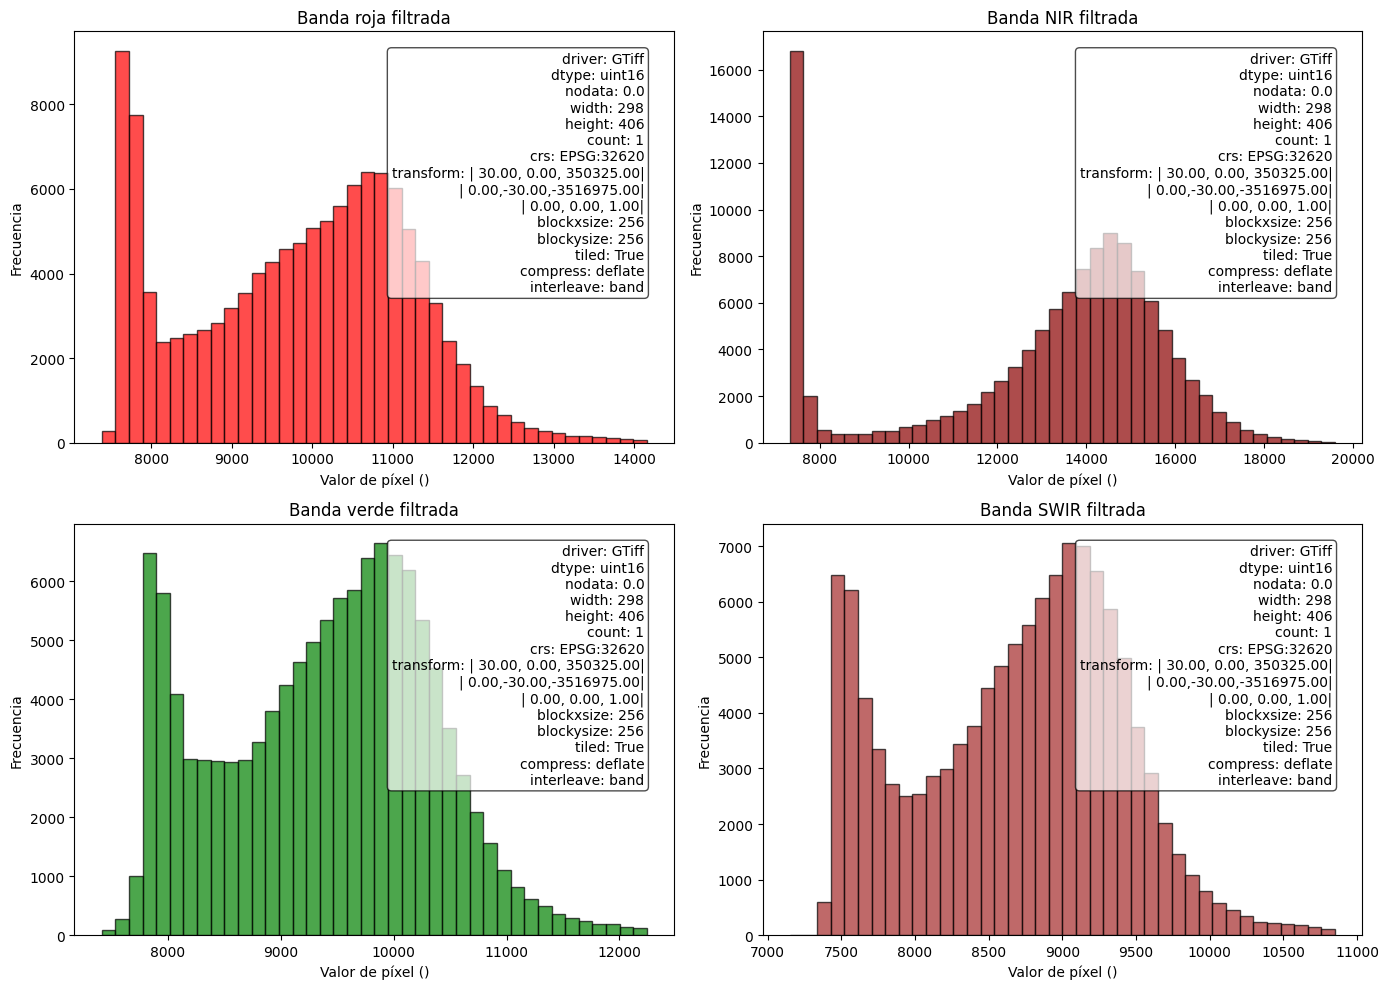

In [257]:
def remove_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return np.where((data < lower_bound) | (data > upper_bound), np.nan, data)

# Lista de archivos de imagen filtrados y perfiles a investigar
bands = [(red_band, profile_red, 'Banda roja filtrada'),
         (nir_band, profile_nir, 'Banda NIR filtrada'),
         (green_band, profile_green, 'Banda verde filtrada'),
         (blue_band, profile_blue, 'Banda SWIR filtrada'),
         (swir_band, profile_swir, 'Banda SWIR filtrada')]

# Diccionario de colores para cada banda
band_colors = {
    'Banda roja filtrada': 'red',
    'Banda NIR filtrada': 'darkred',
    'Banda verde filtrada': 'green',
    'Banda SWIR filtrada': 'brown'
}

# Generar histogramas
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for (band, profile, title), ax in zip(bands, axes.flatten()):
    band_filtered = remove_outliers(band.flatten())
    color = band_colors[title]
    ax.hist(band_filtered, bins=40, color=color, edgecolor='black', alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel('Valor de píxel ()')
    ax.set_ylabel('Frecuencia')
    annotate_metadata(ax, profile)

plt.tight_layout()
plt.show()

### 2. **Cálculo de índices y comparación de estadísticas**:

Una vez que las bandas espectrales han sido cargadas y pre-procesadas adecuadamente, el siguiente paso es calcular los índices NDVI y MNDWI. Estos índices son cruciales para analizar la vegetación y la presencia de cuerpos de agua, respectivamente.

#### Función `calculate_ndvi`

El Índice de Vegetación de Diferencia Normalizada (NDVI) se calcula utilizando las bandas de infrarrojo cercano (NIR) y roja. Este índice ayuda a identificar la presencia y salud de la vegetación en la imagen.

- **Argumentos**:
  - `nir`: Banda de infrarrojo cercano como un array de tipo flotante.
  - `red`: Banda roja como un array de tipo flotante.

#### Función `calculate_mndwi`

El Índice de Agua de Diferencia Normalizada Modificado (MNDWI) se calcula utilizando la banda verde y la banda de infrarrojo de onda corta (SWIR). Este índice es utilizado para realzar las características del agua.

- **Argumentos**:
  - `green`: Banda verde como un array de tipo flotante.
  - `swir`: Banda SWIR como un array de tipo flotante.

#### Comparación de datos

Se usa la función `calculate_statistics` para calcular las estadísticas descriptivas de cada imagen filtrada y así poder compararlas con los datos de las bandas crudas. Se imprimen los datos resultantes.

Índices crudos calculados correctamente.
Índices filtrados calculados correctamente.
Estadísticas antes del filtrado:
Estadísticas para Banda roja:
Media: 9841.64
Desviación Estándar: 1387.16
Mínimo: 7384.00
Máximo: 20052.00
-------------------------
Estadísticas para Banda NIR:
Media: 13047.86
Desviación Estándar: 2873.55
Mínimo: 7028.00
Máximo: 23214.00
-------------------------
Estadísticas para Banda verde:
Media: 9408.94
Desviación Estándar: 970.28
Mínimo: 7415.00
Máximo: 17435.00
-------------------------
Estadísticas para Banda SWIR:
Media: 14691.10
Desviación Estándar: 4176.35
Mínimo: 6728.00
Máximo: 25928.00
-------------------------

Estadísticas después del filtrado:
Estadísticas para Banda roja filtrada:
Media: 9831.14
Desviación Estándar: 1368.83
Mínimo: 7384.00
Máximo: 14157.00
-------------------------
Estadísticas para Banda NIR filtrada:
Media: 13044.48
Desviación Estándar: 2869.16
Mínimo: 7328.00
Máximo: 19596.00
-------------------------
Estadísticas para Banda verde

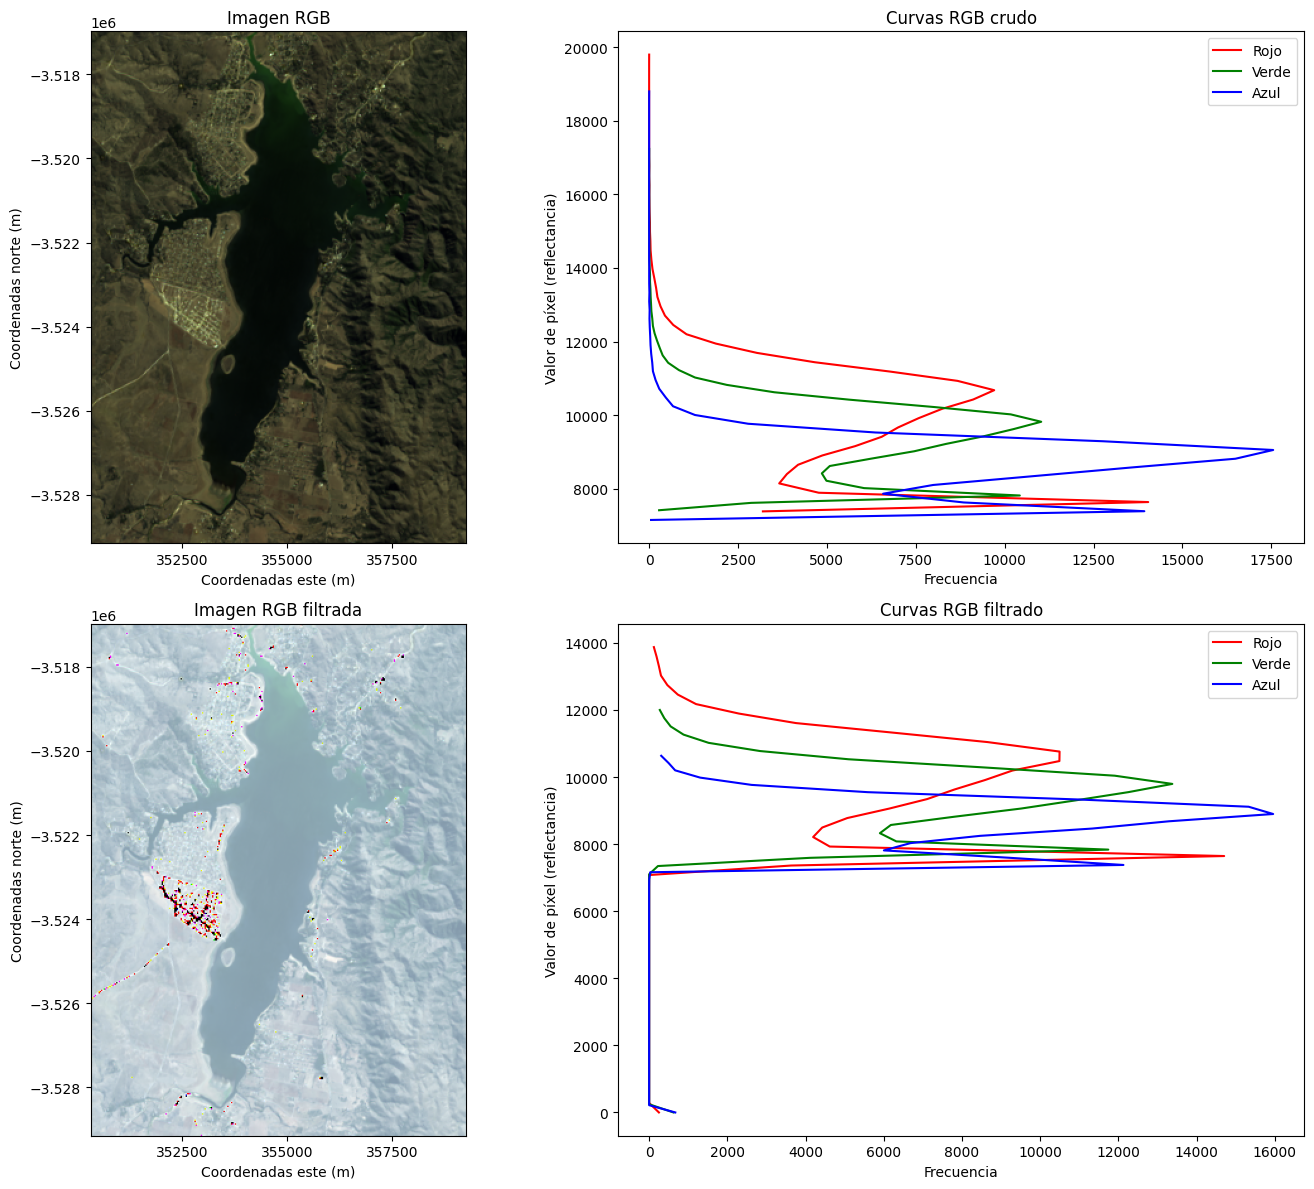

In [258]:
def calculate_ndvi(nir, red):
    return (nir - red) / (nir + red)

def calculate_mndwi(green, swir):
    return (green - swir) / (green + swir)

# Calcular índices para imágenes crudas
try:
    ndvi_raw = calculate_ndvi(nir_band.astype(float), red_band.astype(float))
    mndwi_raw = calculate_mndwi(green_band.astype(float), swir_band.astype(float))
    print("Índices crudos calculados correctamente.")
except Exception as e:
    print(f"Hubo un error al calcular los índices crudos: {e}")

# Filtrar las bandas para remover outliers y calcular índices para imágenes filtradas
try:
    red_band_filtered = remove_outliers(red_band.flatten()).reshape(red_band.shape)
    nir_band_filtered = remove_outliers(nir_band.flatten()).reshape(nir_band.shape)
    green_band_filtered = remove_outliers(green_band.flatten()).reshape(green_band.shape)
    blue_band_filtered = remove_outliers(blue_band.flatten()).reshape(blue_band.shape)
    swir_band_filtered = remove_outliers(swir_band.flatten()).reshape(swir_band.shape)

    ndvi_filtered = calculate_ndvi(nir_band_filtered.astype(float), red_band_filtered.astype(float))
    mndwi_filtered = calculate_mndwi(green_band_filtered.astype(float), swir_band_filtered.astype(float))
    print("Índices filtrados calculados correctamente.")
except Exception as e:
    print(f"Hubo un error al calcular los índices con filtro: {e}")

print('Estadísticas antes del filtrado:')
calculate_statistics(red_band, 'Banda roja')
calculate_statistics(nir_band, 'Banda NIR')
calculate_statistics(green_band, 'Banda verde')
calculate_statistics(swir_band, 'Banda SWIR')

print('\nEstadísticas después del filtrado:')
calculate_statistics(red_band_filtered, 'Banda roja filtrada')
calculate_statistics(nir_band_filtered, 'Banda NIR filtrada')
calculate_statistics(green_band_filtered, 'Banda verde filtrada')
calculate_statistics(swir_band_filtered, 'Banda SWIR filtrada')

# Eliminar NaNs para las curvas RGB
def replace_nan_with_value(band, value=0):
    band[np.isnan(band)] = value
    return band

# Reemplazar NaNs con 0
red_band_filtered_nonan = replace_nan_with_value(red_band_filtered)
green_band_filtered_nonan = replace_nan_with_value(green_band_filtered)
blue_band_filtered_nonan = replace_nan_with_value(blue_band_filtered)

red_band_filtered_normalized = normalize_band(red_band_filtered_nonan)
green_band_filtered_normalized = normalize_band(green_band_filtered_nonan)
blue_band_filtered_normalized = normalize_band(blue_band_filtered_nonan)

# Apilar las bandas en una imagen RGB filtered
rgb_image_filtered = np.dstack((red_band_filtered_normalized, green_band_filtered_normalized, blue_band_filtered_normalized))

# Crear función para graficar las curvas RGB
def plot_rgb_curves(ax, red, green, blue, title):
    bins = 50
    red_hist, red_bins = np.histogram(red.flatten(), bins=bins)
    green_hist, green_bins = np.histogram(green.flatten(), bins=bins)
    blue_hist, blue_bins = np.histogram(blue.flatten(), bins=bins)
    
    ax.plot(red_hist, red_bins[:-1], color='red', label='Rojo')
    ax.plot(green_hist, green_bins[:-1], color='green', label='Verde')
    ax.plot(blue_hist, blue_bins[:-1], color='blue', label='Azul')
    ax.set_title(title)
    ax.set_xlabel('Frecuencia')
    ax.set_ylabel('Valor de píxel (reflectancia)')
    ax.legend()

# Obtener la transformación y CRS para la visualización
with rasterio.open(red_band_path) as src:
    transform = src.transform

# Visualizar la imagen RGB y las curvas
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

extent = (transform[2], transform[2] + rgb_image.shape[1] * transform[0], transform[5] + rgb_image.shape[0] * transform[4], transform[5])

# Imagen RGB cruda
ax[0, 0].imshow(rgb_image, extent=extent)
ax[0, 0].set_title('Imagen RGB', color='black')
ax[0, 0].set_xlabel('Coordenadas este (m)')
ax[0, 0].set_ylabel('Coordenadas norte (m)')
ax[0, 0].xaxis.set_major_locator(MaxNLocator(nbins=4))  # Ajustar número de divisiones del eje x

# Curvas RGB crudas
plot_rgb_curves(ax[0, 1], red_band, green_band, blue_band, 'Curvas RGB crudo')

# Imagen RGB filtrada
ax[1, 0].imshow(rgb_image_filtered, extent=extent)
ax[1, 0].set_title('Imagen RGB filtrada', color='black')
ax[1, 0].set_xlabel('Coordenadas este (m)')
ax[1, 0].set_ylabel('Coordenadas norte (m)')
ax[1, 0].xaxis.set_major_locator(MaxNLocator(nbins=4))  # Ajustar número de divisiones del eje x

# Curvas RGB filtradas
plot_rgb_curves(ax[1, 1], red_band_filtered_nonan, green_band_filtered_nonan, blue_band_filtered_nonan, 'Curvas RGB filtrado')

plt.tight_layout()
plt.show()


### 3. **Visualización parcial**:

Después de calcular los índices NDVI y MNDWI, la siguiente etapa en nuestro análisis es visualizar estos índices para evaluar las diferencias espaciales y la distribución de la vegetación y el agua, respectivamente. Estas visualizaciones son esenciales para una interpretación rápida y efectiva de los datos satelitales.

#### Implementación del código para visualización

Utilizamos la biblioteca `matplotlib` para crear las visualizaciones. El código configura una figura con dos subgráficos (`subplots`), cada uno dedicado a uno de los índices, compartiendo el mismo rango de valores y una leyenda común para facilitar la comparación directa.

- **Primer subgráfico (NDVI)**: Muestra el NDVI utilizando una paleta de colores azules (`Blues`). Además, se agregan estadísticas descriptivas como la media, desviación estándar, valor mínimo y valor máximo.
  
- **Segundo subgráfico (MNDWI)**: Muestra el MNDWI también utilizando la paleta de colores azules (`Blues`) con las mismas estadísticas descriptivas.

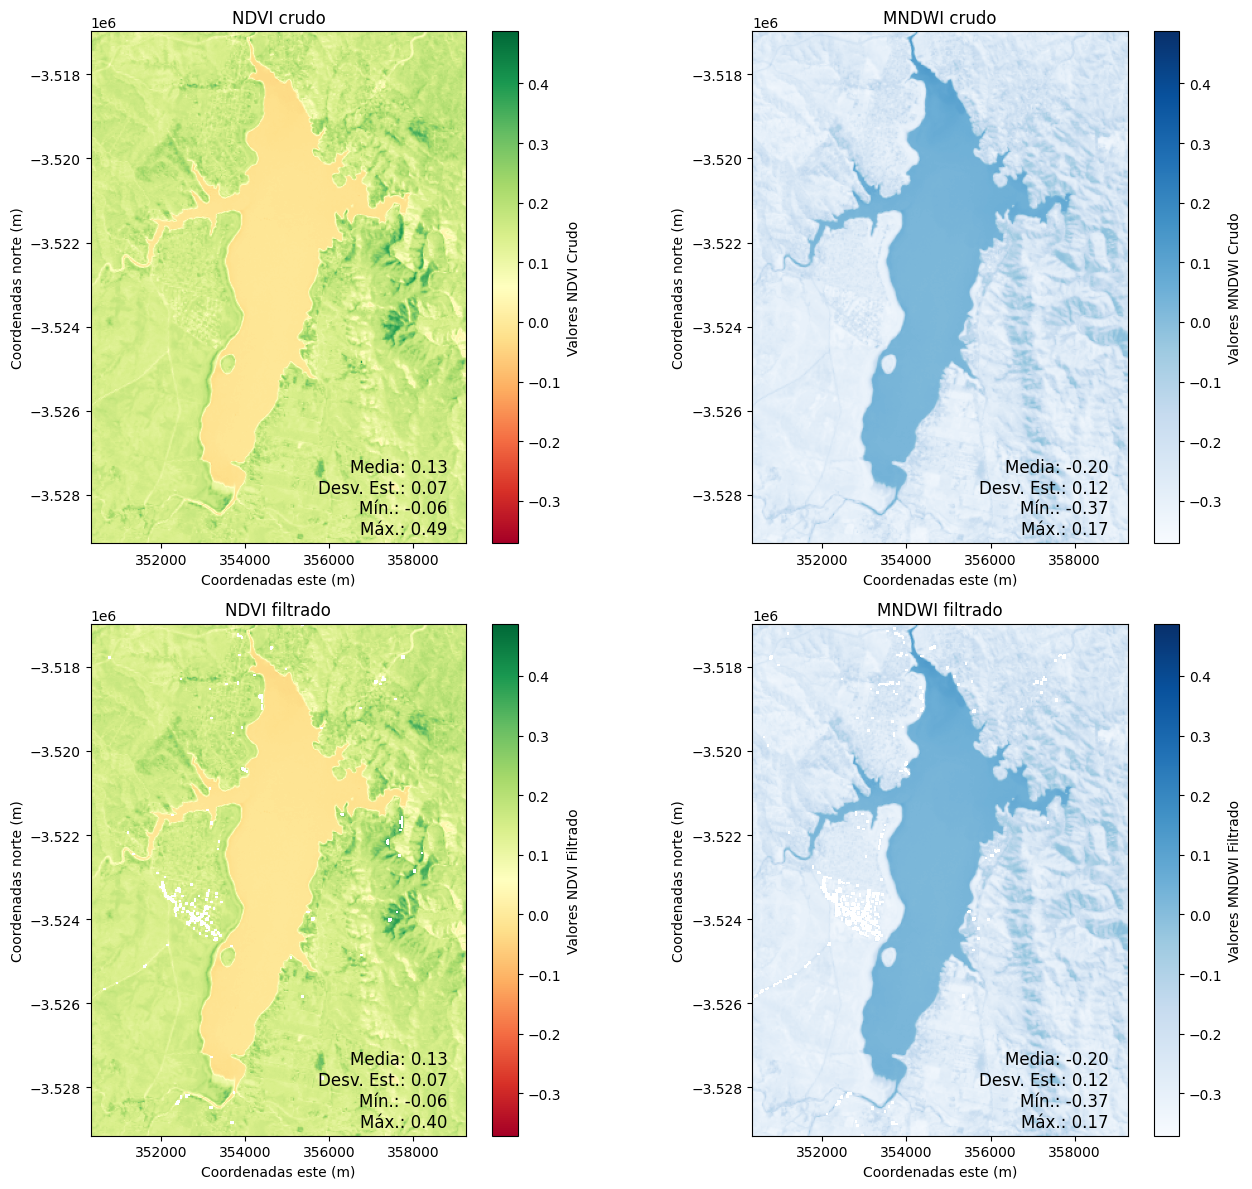

In [259]:
# Calcular estadísticas para NDVI y MNDWI crudos
ndvi_raw_mean = np.nanmean(ndvi_raw)
ndvi_raw_std = np.nanstd(ndvi_raw)
ndvi_raw_min = np.nanmin(ndvi_raw)
ndvi_raw_max = np.nanmax(ndvi_raw)

mndwi_raw_mean = np.nanmean(mndwi_raw)
mndwi_raw_std = np.nanstd(mndwi_raw)
mndwi_raw_min = np.nanmin(mndwi_raw)
mndwi_raw_max = np.nanmax(mndwi_raw)

# Calcular estadísticas para NDVI y MNDWI filtrados
ndvi_filtered_mean = np.nanmean(ndvi_filtered)
ndvi_filtered_std = np.nanstd(ndvi_filtered)
ndvi_filtered_min = np.nanmin(ndvi_filtered)
ndvi_filtered_max = np.nanmax(ndvi_filtered)

mndwi_filtered_mean = np.nanmean(mndwi_filtered)
mndwi_filtered_std = np.nanstd(mndwi_filtered)
mndwi_filtered_min = np.nanmin(mndwi_filtered)
mndwi_filtered_max = np.nanmax(mndwi_filtered)

# Encontrar el rango común para NDVI y MNDWI
vmin = min(np.nanmin(ndvi_raw), np.nanmin(mndwi_raw), np.nanmin(ndvi_filtered), np.nanmin(mndwi_filtered))
vmax = max(np.nanmax(ndvi_raw), np.nanmax(mndwi_raw), np.nanmax(ndvi_filtered), np.nanmax(mndwi_filtered))

with rasterio.open(red_band_path) as src:
    transform = src.transform
    crs = src.crs

# Visualizar
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

# NDVI crudo
ndvi_raw_image = ax[0, 0].imshow(ndvi_raw, cmap='RdYlGn', vmin=vmin, vmax=vmax, extent=(transform[2], transform[2] + ndvi_raw.shape[1] * transform[0], transform[5] + ndvi_raw.shape[0] * transform[4], transform[5]))
ax[0, 0].set_title('NDVI crudo', color='black')
ax[0, 0].text(0.95, 0.01, f'Media: {ndvi_raw_mean:.2f}\nDesv. Est.: {ndvi_raw_std:.2f}\nMín.: {ndvi_raw_min:.2f}\nMáx.: {ndvi_raw_max:.2f}',
              verticalalignment='bottom', horizontalalignment='right',
              transform=ax[0, 0].transAxes, color='black', fontsize=12)
ax[0, 0].set_xlabel('Coordenadas este (m)')
ax[0, 0].set_ylabel('Coordenadas norte (m)')
ax[0, 0].xaxis.set_major_locator(MaxNLocator(nbins=5))  # Ajustar número de divisiones del eje x

# MNDWI crudo
mndwi_raw_image = ax[0, 1].imshow(mndwi_raw, cmap='Blues', vmin=vmin, vmax=vmax, extent=(transform[2], transform[2] + mndwi_raw.shape[1] * transform[0], transform[5] + mndwi_raw.shape[0] * transform[4], transform[5]))
ax[0, 1].set_title('MNDWI crudo', color='black')
ax[0, 1].text(0.95, 0.01, f'Media: {mndwi_raw_mean:.2f}\nDesv. Est.: {mndwi_raw_std:.2f}\nMín.: {mndwi_raw_min:.2f}\nMáx.: {mndwi_raw_max:.2f}',
              verticalalignment='bottom', horizontalalignment='right',
              transform=ax[0, 1].transAxes, color='black', fontsize=12)
ax[0, 1].set_xlabel('Coordenadas este (m)')
ax[0, 1].set_ylabel('Coordenadas norte (m)')
ax[0, 1].xaxis.set_major_locator(MaxNLocator(nbins=5))  # Ajustar número de divisiones del eje x

# NDVI filtrado
ndvi_filtered_image = ax[1, 0].imshow(ndvi_filtered, cmap='RdYlGn', vmin=vmin, vmax=vmax, extent=(transform[2], transform[2] + ndvi_filtered.shape[1] * transform[0], transform[5] + ndvi_filtered.shape[0] * transform[4], transform[5]))
ax[1, 0].set_title('NDVI filtrado', color='black')
ax[1, 0].text(0.95, 0.01, f'Media: {ndvi_filtered_mean:.2f}\nDesv. Est.: {ndvi_filtered_std:.2f}\nMín.: {ndvi_filtered_min:.2f}\nMáx.: {ndvi_filtered_max:.2f}',
              verticalalignment='bottom', horizontalalignment='right',
              transform=ax[1, 0].transAxes, color='black', fontsize=12)
ax[1, 0].set_xlabel('Coordenadas este (m)')
ax[1, 0].set_ylabel('Coordenadas norte (m)')
ax[1, 0].xaxis.set_major_locator(MaxNLocator(nbins=5))  # Ajustar número de divisiones del eje x

# MNDWI filtrado
mndwi_filtered_image = ax[1, 1].imshow(mndwi_filtered, cmap='Blues', vmin=vmin, vmax=vmax, extent=(transform[2], transform[2] + mndwi_filtered.shape[1] * transform[0], transform[5] + mndwi_filtered.shape[0] * transform[4], transform[5]))
ax[1, 1].set_title('MNDWI filtrado', color='black')
ax[1, 1].text(0.95, 0.01, f'Media: {mndwi_filtered_mean:.2f}\nDesv. Est.: {mndwi_filtered_std:.2f}\nMín.: {mndwi_filtered_min:.2f}\nMáx.: {mndwi_filtered_max:.2f}',
              verticalalignment='bottom', horizontalalignment='right',
              transform=ax[1, 1].transAxes, color='black', fontsize=12)
ax[1, 1].set_xlabel('Coordenadas este (m)')
ax[1, 1].set_ylabel('Coordenadas norte (m)')
ax[1, 1].xaxis.set_major_locator(MaxNLocator(nbins=5))  # Ajustar número de divisiones del eje x

# Añadir colorbars comunes
cbar_ndvi_raw = fig.colorbar(ndvi_raw_image, ax=ax[0, 0], orientation='vertical', fraction=0.046, pad=0.04)
cbar_ndvi_raw.set_label('Valores NDVI Crudo')
cbar_mndwi_raw = fig.colorbar(mndwi_raw_image, ax=ax[0, 1], orientation='vertical', fraction=0.046, pad=0.04)
cbar_mndwi_raw.set_label('Valores MNDWI Crudo')
cbar_ndvi_filtered = fig.colorbar(ndvi_filtered_image, ax=ax[1, 0], orientation='vertical', fraction=0.046, pad=0.04)
cbar_ndvi_filtered.set_label('Valores NDVI Filtrado')
cbar_mndwi_filtered = fig.colorbar(mndwi_filtered_image, ax=ax[1, 1], orientation='vertical', fraction=0.046, pad=0.04)
cbar_mndwi_filtered.set_label('Valores MNDWI Filtrado')

plt.tight_layout()
plt.show()

### 4. **Análisis estadístico**:

Después de calcular los índices NDVI y MNDWI filtrados, la siguiente etapa en nuestro análisis es visualizar estos índices para evaluar las diferencias espaciales y la distribución de la vegetación y el agua, respectivamente. Estas visualizaciones son esenciales para una interpretación rápida y efectiva de los datos satelitales.

#### Implementación del Código para Visualización

Utilizamos la biblioteca `matplotlib` para crear las visualizaciones. El código configura una figura con dos subgráficos (`subplots`), cada uno dedicado a uno de los índices, compartiendo el mismo rango de valores y una leyenda común para facilitar la comparación directa.

Además, se agregan áreas sombreadas con transparencia en los histogramas para indicar las regiones correspondientes a agua y tierra, lo que facilita la interpretación visual de los datos.

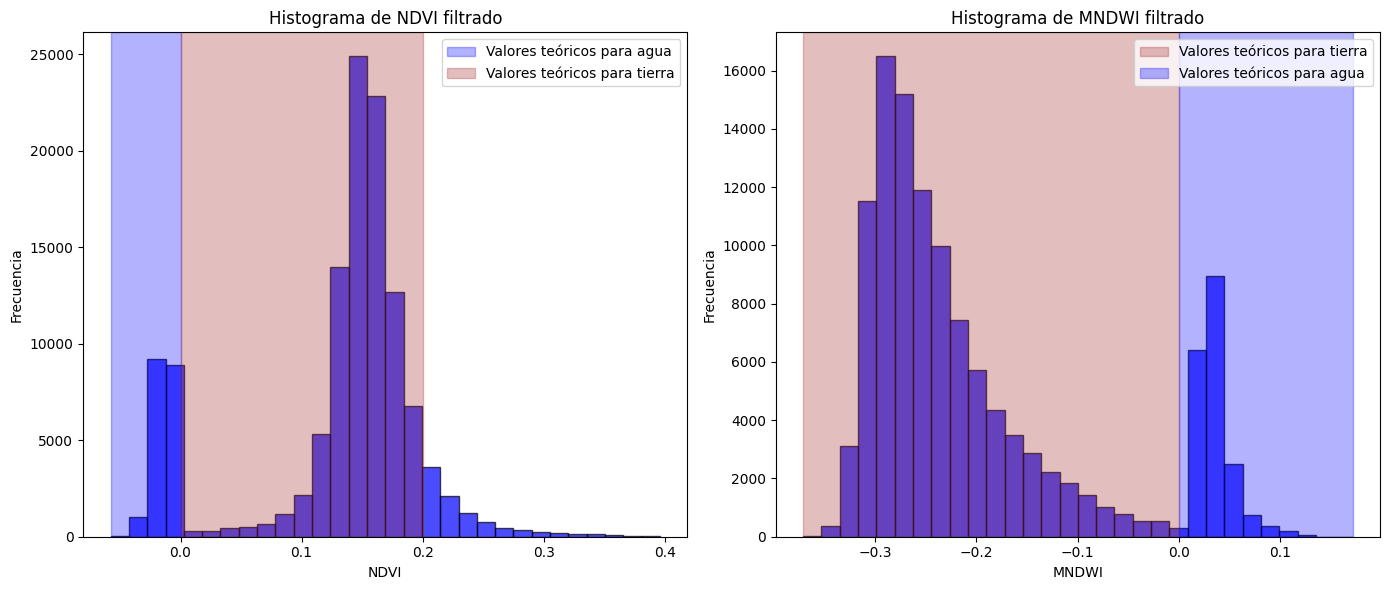

In [260]:
import matplotlib.patches as patches

# Crear histogramas
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Histograma de NDVI
ax[0].hist(ndvi_filtered[~np.isnan(ndvi_filtered)], bins=30, color='blue', edgecolor='black', alpha=0.7)
ax[0].set_title('Histograma de NDVI filtrado')
ax[0].set_xlabel('NDVI')
ax[0].set_ylabel('Frecuencia')
# Parches de fondo
ndvi_ylim = ax[0].get_ylim()[1]
ax[0].add_patch(patches.Rectangle((ndvi_filtered_min, 0), 0 - ndvi_filtered_min, ndvi_ylim, color='blue', alpha=0.3, label='Valores teóricos para agua'))
ax[0].add_patch(patches.Rectangle((0, 0), 0.2 - 0, ndvi_ylim, color='brown', alpha=0.3, label='Valores teóricos para tierra'))
ax[0].legend()

# Histograma de MNDWI
ax[1].hist(mndwi_filtered[~np.isnan(mndwi_filtered)], bins=30, color='blue', edgecolor='black', alpha=0.7)
ax[1].set_title('Histograma de MNDWI filtrado')
ax[1].set_xlabel('MNDWI')
ax[1].set_ylabel('Frecuencia')
# Parches de fondo
mndwi_ylim = ax[1].get_ylim()[1]
ax[1].add_patch(patches.Rectangle((mndwi_filtered_min, 0), 0 - mndwi_filtered_min, mndwi_ylim, color='brown', alpha=0.3, label='Valores teóricos para tierra'))
ax[1].add_patch(patches.Rectangle((0, 0), mndwi_filtered_max - 0, mndwi_ylim, color='blue', alpha=0.3, label='Valores teóricos para agua'))
ax[1].legend()

plt.tight_layout()
plt.show()

### 5. **Post-procesamiento de datos**:

En este apartado, crearemos máscaras binarias para identificar las áreas de agua en las imágenes NDVI y MNDWI. Luego, convertiremos estas máscaras en polígonos y los visualizaremos sobre las imágenes originales para validar el resultado.

#### Implementación del Código

Utilizamos las bibliotecas `numpy`, `matplotlib`, `skimage`, `shapely` y `descartes` para procesar las imágenes y visualizar los resultados. A continuación, se detallan los pasos y el código empleado.

**Paso 1: Definir umbrales para identificar agua en NDVI y MNDWI**

Utilizamos los siguientes umbrales:
- Píxeles con NDVI <= 0 se consideran agua.
- Píxeles con MNDWI >= 0 se consideran agua.

**Paso 2: Crear máscaras binarias**

Generamos máscaras binarias donde los píxeles de agua son `True` y los demás son `False`.

**Paso 3: Convertir las máscaras en polígonos**

Usamos la función `mask_to_polygons` que convierte una máscara binaria en polígonos utilizando `skimage.measure.find_contours` y `shapely.geometry.Polygon`.

**Paso 4: Visualizar los polígonos sobre la imagen original**

Superponemos los polígonos sobre las imágenes originales de NDVI y MNDWI para validar los resultados.

In [261]:
from rasterio.features import shapes
from shapely.geometry import shape
import geopandas as gpd

# Definir umbrales para identificar agua en NDVI y MNDWI
ndvi_water_threshold = 0.0  # Píxeles con NDVI <= 0 se consideran agua
mndwi_water_threshold = 0.0  # Píxeles con MNDWI >= 0 se consideran agua

# Crear máscaras binarias
ndvi_water_mask = ndvi_filtered <= ndvi_water_threshold
mndwi_water_mask = mndwi_filtered >= mndwi_water_threshold

# Función para convertir una máscara binaria en polígonos usando rasterio y geopandas
def mask_to_polygons(mask, transform):
    mask = mask.astype(np.uint8)  # Convertir a entero 8 bits
    results = (
        {'properties': {'raster_val': v}, 'geometry': s}
        for i, (s, v) in enumerate(shapes(mask, transform=transform))
        if v == 1
    )
    polygons = [shape(result['geometry']) for result in results]
    return polygons

# Obtener la transformación de los archivos de bandas y CRS
with rasterio.open(red_band_path) as src:
    transform = src.transform
    crs = src.crs
print(f'Transformación: {transform}')
print(f'CRS: {crs}')

# Convertir las máscaras en polígonos
ndvi_water_polygons = mask_to_polygons(ndvi_water_mask, transform)
mndwi_water_polygons = mask_to_polygons(mndwi_water_mask, transform)

# Convertir a GeoDataFrame con el mismo CRS que la imagen original
ndvi_gdf = gpd.GeoDataFrame(geometry=ndvi_water_polygons, crs=crs)
mndwi_gdf = gpd.GeoDataFrame(geometry=mndwi_water_polygons, crs=crs)

# Calcular estadísticas para las imágenes crudas y filtradas
def calculate_statistics(data):
    mean = np.nanmean(data)
    std = np.nanstd(data)
    min_val = np.nanmin(data)
    max_val = np.nanmax(data)
    return mean, std, min_val, max_val

ndvi_raw_mean, ndvi_raw_std, ndvi_raw_min, ndvi_raw_max = calculate_statistics(ndvi_raw)
mndwi_raw_mean, mndwi_raw_std, mndwi_raw_min, mndwi_raw_max = calculate_statistics(mndwi_raw)
ndvi_filtered_mean, ndvi_filtered_std, ndvi_filtered_min, ndvi_filtered_max = calculate_statistics(ndvi_filtered)
mndwi_filtered_mean, mndwi_filtered_std, mndwi_filtered_min, mndwi_filtered_max = calculate_statistics(mndwi_filtered)

Transformación: | 30.00, 0.00, 350325.00|
| 0.00,-30.00,-3516975.00|
| 0.00, 0.00, 1.00|
CRS: EPSG:32620


### 6. **Visualización final: Intersección de polígonos**
En este apartado, crearemos máscaras binarias para identificar las áreas de agua en las imágenes NDVI y MNDWI. Luego, convertiremos estas máscaras en polígonos y los visualizaremos sobre las imágenes originales para validar el resultado.

#### Implementación del código
Utilizamos las bibliotecas numpy, matplotlib, rasterio, shapely, y geopandas para procesar las imágenes y visualizar los resultados. A continuación, se detallan los pasos y el código empleado.

**Paso 1: Definir umbrales para identificar agua en NDVI y MNDWI**

Utilizamos los siguientes umbrales:

Píxeles con NDVI ≤ 0 se consideran agua.
Píxeles con MNDWI ≥ 0 se consideran agua.

**Paso 2: Crear máscaras binarias**

Generamos máscaras binarias donde los píxeles de agua son True y los demás son False.

**Paso 3: Convertir las máscaras en polígonos y montarlas en el mapa de los índices crudos**

Usamos la función mask_to_polygons que convierte una máscara binaria en polígonos utilizando rasterio.features.shapes y shapely.geometry.shape.

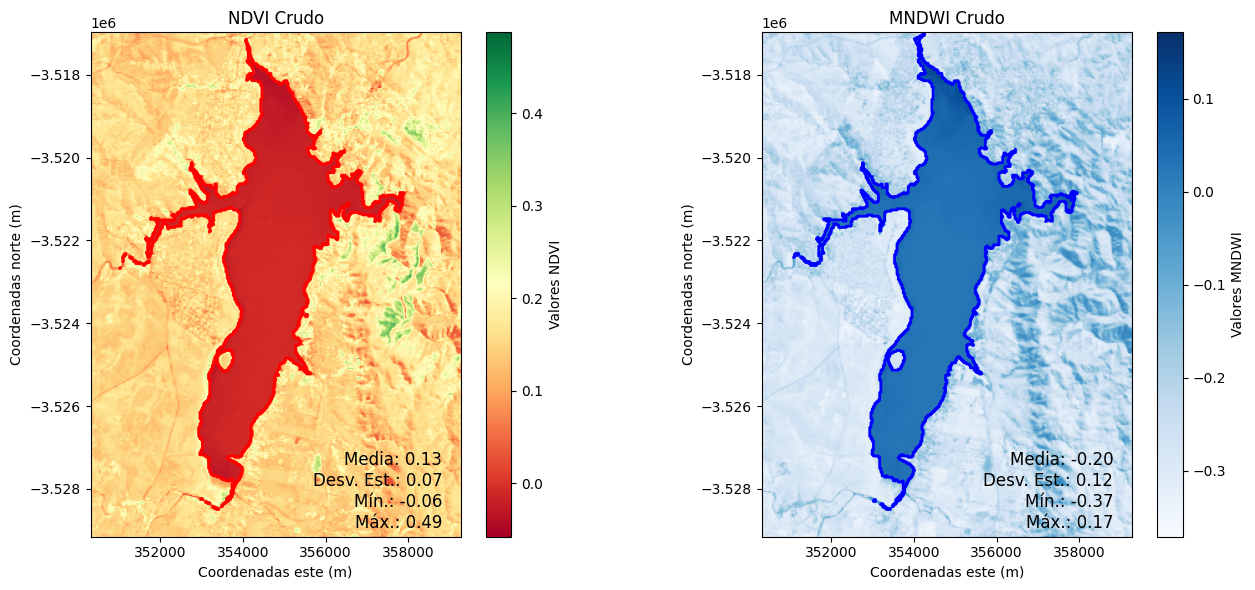

In [262]:
# Visualizar los polígonos sobre la imagen original
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# NDVI Crudo
vmin_ndvi = np.nanmin(ndvi_raw)
vmax_ndvi = np.nanmax(ndvi_raw)
ndvi_raw_image = ax[0].imshow(ndvi_raw, cmap='RdYlGn', vmin=vmin_ndvi, vmax=vmax_ndvi, extent=(transform[2], transform[2] + ndvi_raw.shape[1] * transform[0], transform[5] + ndvi_raw.shape[0] * transform[4], transform[5]))
ax[0].set_title('NDVI Crudo', color='black')
ndvi_gdf.plot(ax=ax[0], facecolor='none', edgecolor='red', linewidth=2)
ax[0].text(0.95, 0.01, f'Media: {ndvi_raw_mean:.2f}\nDesv. Est.: {ndvi_raw_std:.2f}\nMín.: {ndvi_raw_min:.2f}\nMáx.: {ndvi_raw_max:.2f}',
           verticalalignment='bottom', horizontalalignment='right',
           transform=ax[0].transAxes, color='black', fontsize=12)
ax[0].set_xlabel('Coordenadas este (m)')
ax[0].set_ylabel('Coordenadas norte (m)')

# MNDWI Crudo
vmin_mndwi = np.nanmin(mndwi_raw)
vmax_mndwi = np.nanmax(mndwi_raw)
mndwi_raw_image = ax[1].imshow(mndwi_raw, cmap='Blues', vmin=vmin_mndwi, vmax=vmax_mndwi, extent=(transform[2], transform[2] + mndwi_raw.shape[1] * transform[0], transform[5] + mndwi_raw.shape[0] * transform[4], transform[5]))
ax[1].set_title('MNDWI Crudo', color='black')
mndwi_gdf.plot(ax=ax[1], facecolor='none', edgecolor='blue', linewidth=2)
ax[1].text(0.95, 0.01, f'Media: {mndwi_raw_mean:.2f}\nDesv. Est.: {mndwi_raw_std:.2f}\nMín.: {mndwi_raw_min:.2f}\nMáx.: {mndwi_raw_max:.2f}',
           verticalalignment='bottom', horizontalalignment='right',
           transform=ax[1].transAxes, color='black', fontsize=12)
ax[1].set_xlabel('Coordenadas este (m)')
ax[1].set_ylabel('Coordenadas norte (m)')

# Añadir colorbars comunes
cbar_ndvi = fig.colorbar(ndvi_raw_image, ax=ax[0], orientation='vertical', fraction=0.046, pad=0.04)
cbar_ndvi.set_label('Valores NDVI')
cbar_mndwi = fig.colorbar(mndwi_raw_image, ax=ax[1], orientation='vertical', fraction=0.046, pad=0.04)
cbar_mndwi.set_label('Valores MNDWI')

plt.tight_layout()
plt.show()

### 6. **Visualización final: visualización de resultados**
En esta sección, se procederá a intersecar los polígonos de las áreas de agua identificadas en las imágenes filtradas de NDVI y MNDWI. Además, se calcularán las estadísticas y se visualizarán los resultados junto con histogramas verticales.

#### Implementación del código
Utilizamos las bibliotecas numpy, matplotlib, rasterio, shapely, y geopandas para procesar las imágenes y visualizar los resultados.

**Paso 1: Definir umbrales para identificar agua en NDVI y MNDWI**

Los umbrales utilizados son:

Píxeles con NDVI <= 0 se consideran agua.
Píxeles con MNDWI >= 0 se consideran agua.

**Paso 2: Crear máscaras binarias**

Generamos máscaras binarias donde los píxeles de agua son True y los demás son False.

**Paso 3: Convertir las Máscaras en Polígonos**

Usamos la función mask_to_polygons que convierte una máscara binaria en polígonos utilizando rasterio.features.shapes y shapely.geometry.shape.

**Paso 4: Intersecar polígonos con las imágenes filtradas**

Intersecamos los polígonos generados con las imágenes filtradas de NDVI y MNDWI para obtener las áreas de agua.

**Paso 5: Calcular estadísticas y área en hectáreas**

Calculamos las estadísticas (media, desviación estándar, mínimo y máximo) y el área en hectáreas para las imágenes filtradas e intersectadas.

**Paso 6: Visualización de resultados con histogramas**

Visualizamos los resultados junto con histogramas verticales y los polígonos de agua sobre las imágenes.

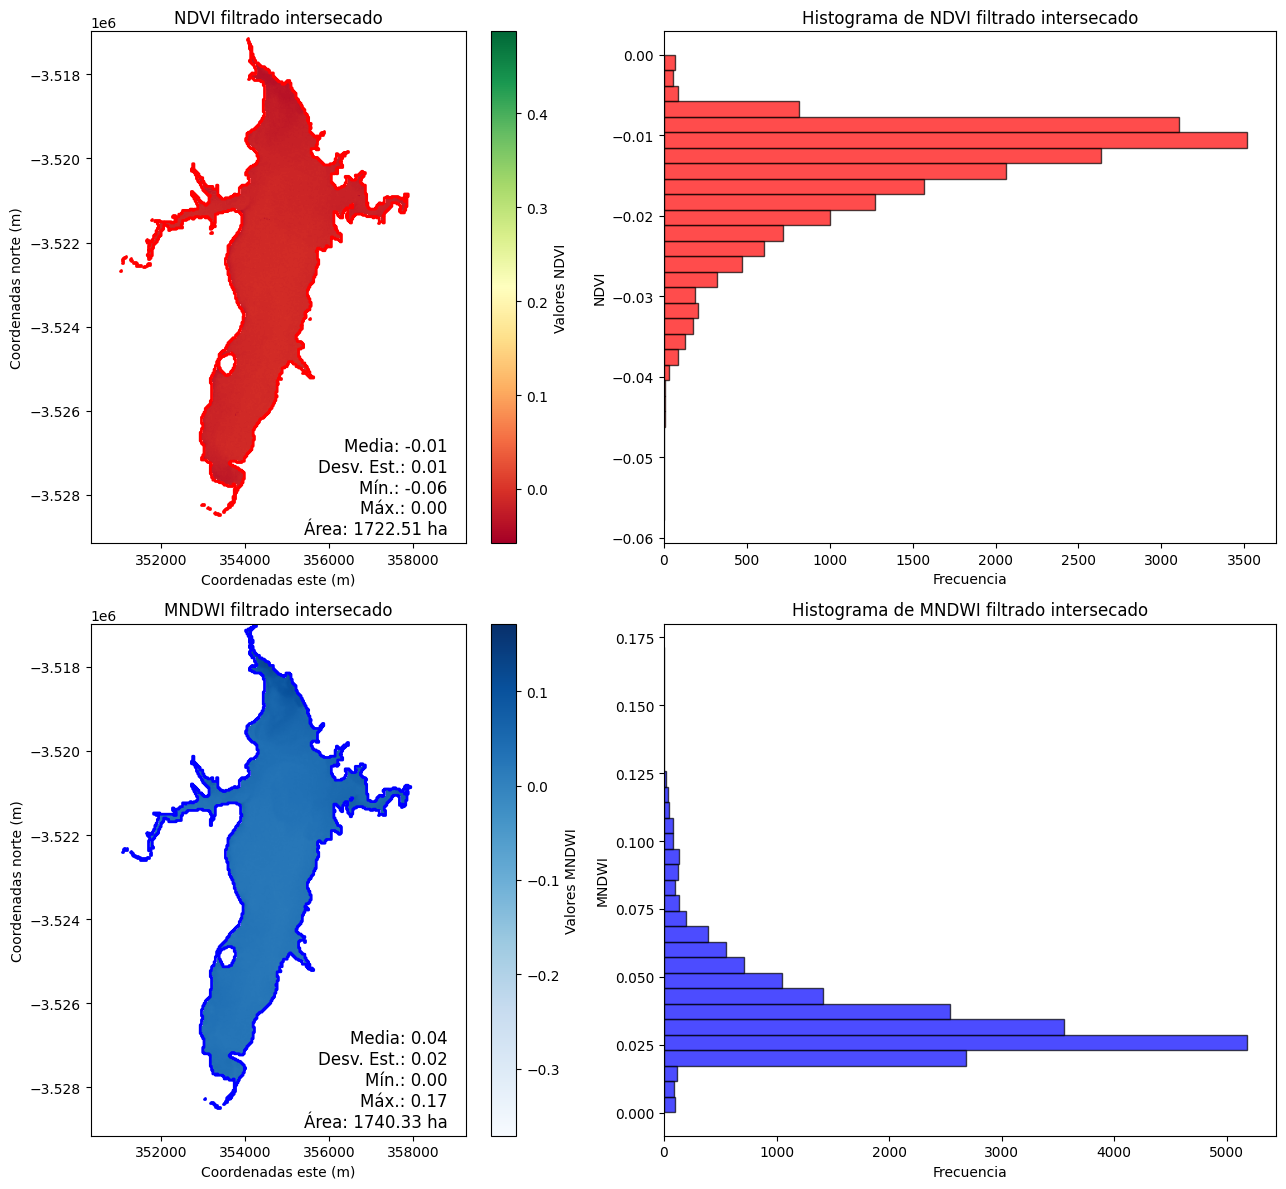

In [263]:
# Definir umbrales para identificar agua en NDVI y MNDWI
ndvi_water_threshold = 0.0  # Píxeles con NDVI <= 0 se consideran agua
mndwi_water_threshold = 0.0  # Píxeles con MNDWI >= 0 se consideran agua

# Crear máscaras binarias
ndvi_water_mask = ndvi_filtered <= ndvi_water_threshold
mndwi_water_mask = mndwi_filtered >= mndwi_water_threshold

# Función para convertir una máscara binaria en polígonos usando rasterio y geopandas
def mask_to_polygons(mask, transform):
    mask = mask.astype(np.uint8)  # Convertir a entero 8 bits
    results = (
        {'properties': {'raster_val': v}, 'geometry': s}
        for i, (s, v) in enumerate(shapes(mask, transform=transform))
        if v == 1
    )
    polygons = [shape(result['geometry']) for result in results]
    return polygons

# Obtener la transformación de los archivos de bandas y CRS
with rasterio.open(red_band_path) as src:
    transform = src.transform
    crs = src.crs

# Convertir las máscaras en polígonos
ndvi_water_polygons = mask_to_polygons(ndvi_water_mask, transform)
mndwi_water_polygons = mask_to_polygons(mndwi_water_mask, transform)

# Convertir a GeoDataFrame con el mismo CRS que la imagen original
ndvi_gdf = gpd.GeoDataFrame(geometry=ndvi_water_polygons, crs=crs)
mndwi_gdf = gpd.GeoDataFrame(geometry=mndwi_water_polygons, crs=crs)

# Intersecar polígonos con las imágenes filtradas
def intersection_with_polygons(polygons_gdf, image_data, transform):
    shapes = list(polygons_gdf.geometry)
    mask = rasterio.features.geometry_mask([mapping(s) for s in shapes], transform=transform, invert=True, out_shape=image_data.shape)
    return np.where(mask, image_data, np.nan)

ndvi_intersected = intersection_with_polygons(ndvi_gdf, ndvi_filtered, transform)
mndwi_intersected = intersection_with_polygons(mndwi_gdf, mndwi_filtered, transform)

# Calcular estadísticas para las imágenes filtradas e intersectadas
def calculate_statistics(data):
    mean = np.nanmean(data)
    std = np.nanstd(data)
    min_val = np.nanmin(data)
    max_val = np.nanmax(data)
    return mean, std, min_val, max_val

ndvi_filtered_mean, ndvi_filtered_std, ndvi_filtered_min, ndvi_filtered_max = calculate_statistics(ndvi_intersected)
mndwi_filtered_mean, mndwi_filtered_std, mndwi_filtered_min, mndwi_filtered_max = calculate_statistics(mndwi_intersected)

# Calcular área en hectáreas para NDVI y MNDWI
def calculate_area(geometry):
    return geometry.area / 10000  # Convertir de m² a hectáreas

ndvi_area = ndvi_gdf.geometry.apply(calculate_area).sum()
mndwi_area = mndwi_gdf.geometry.apply(calculate_area).sum()

# Visualizar los resultados con histogramas
fig, ax = plt.subplots(2, 2, figsize=(14, 12))

# NDVI filtrado intersecado
ndvi_intersected_image = ax[0, 0].imshow(ndvi_intersected, cmap='RdYlGn', vmin=vmin_ndvi, vmax=vmax_ndvi, extent=(transform[2], transform[2] + ndvi_intersected.shape[1] * transform[0], transform[5] + ndvi_intersected.shape[0] * transform[4], transform[5]))
ax[0, 0].set_title('NDVI filtrado intersecado', color='black')
ax[0, 0].text(0.95, 0.01, f'Media: {ndvi_filtered_mean:.2f}\nDesv. Est.: {ndvi_filtered_std:.2f}\nMín.: {ndvi_filtered_min:.2f}\nMáx.: {ndvi_filtered_max:.2f}\nÁrea: {ndvi_area:.2f} ha',
              verticalalignment='bottom', horizontalalignment='right',
              transform=ax[0, 0].transAxes, color='black', fontsize=12)
ax[0, 0].set_xlabel('Coordenadas este (m)')
ax[0, 0].set_ylabel('Coordenadas norte (m)')
ax[0, 0].xaxis.set_major_locator(MaxNLocator(nbins=5))  # Ajustar número de divisiones del eje x
ndvi_gdf.plot(ax=ax[0, 0], facecolor='none', edgecolor='red', linewidth=2)

# Histograma NDVI
ax[0, 1].hist(ndvi_intersected[~np.isnan(ndvi_intersected)], bins=30, color='red', edgecolor='black', alpha=0.7, orientation='horizontal')
ax[0, 1].set_title('Histograma de NDVI filtrado intersecado')
ax[0, 1].set_xlabel('Frecuencia')
ax[0, 1].set_ylabel('NDVI')

# MNDWI filtrado intersecado
mndwi_intersected_image = ax[1, 0].imshow(mndwi_intersected, cmap='Blues', vmin=vmin_mndwi, vmax=vmax_mndwi, extent=(transform[2], transform[2] + mndwi_intersected.shape[1] * transform[0], transform[5] + mndwi_intersected.shape[0] * transform[4], transform[5]))
ax[1, 0].set_title('MNDWI filtrado intersecado', color='black')
ax[1, 0].text(0.95, 0.01, f'Media: {mndwi_filtered_mean:.2f}\nDesv. Est.: {mndwi_filtered_std:.2f}\nMín.: {mndwi_filtered_min:.2f}\nMáx.: {mndwi_filtered_max:.2f}\nÁrea: {mndwi_area:.2f} ha',
              verticalalignment='bottom', horizontalalignment='right',
              transform=ax[1, 0].transAxes, color='black', fontsize=12)
ax[1, 0].set_xlabel('Coordenadas este (m)')
ax[1, 0].set_ylabel('Coordenadas norte (m)')
ax[1, 0].xaxis.set_major_locator(MaxNLocator(nbins=5))  # Ajustar número de divisiones del eje x
mndwi_gdf.plot(ax=ax[1, 0], facecolor='none', edgecolor='blue', linewidth=2)

# Histograma MNDWI
ax[1, 1].hist(mndwi_intersected[~np.isnan(mndwi_intersected)], bins=30, color='blue', edgecolor='black', alpha=0.7, orientation='horizontal')
ax[1, 1].set_title('Histograma de MNDWI filtrado intersecado')
ax[1, 1].set_xlabel('Frecuencia')
ax[1, 1].set_ylabel('MNDWI')

# Añadir colorbars comunes
cbar_ndvi_filtered = fig.colorbar(ndvi_intersected_image, ax=ax[0, 0], orientation='vertical', fraction=0.046, pad=0.04)
cbar_ndvi_filtered.set_label('Valores NDVI')
cbar_mndwi_filtered = fig.colorbar(mndwi_intersected_image, ax=ax[1, 0], orientation='vertical', fraction=0.046, pad=0.04)
cbar_mndwi_filtered.set_label('Valores MNDWI')

plt.tight_layout()
plt.show()


### **Conclusiones**
El análisis realizado se centró en la evaluación de las imágenes satelitales utilizando los índices NDVI (Normalized Difference Vegetation Index) y MNDWI (Modified Normalized Difference Water Index). A continuación, se presentan las conclusiones derivadas de este estudio:

#### 1. Descompresión y Carga de Imágenes
La descompresión y carga de las bandas espectrales se realizaron con éxito, permitiendo trabajar con las bandas necesarias para el cálculo de los índices NDVI y MNDWI. Las bandas procesadas incluyeron las bandas roja, NIR, verde, SWIR y azul.

#### 2. Cálculo de Índices
Se calcularon los índices NDVI y MNDWI tanto para las imágenes crudas como para las imágenes filtradas (removiendo outliers). Los valores obtenidos de estos índices permiten identificar y diferenciar áreas de vegetación y cuerpos de agua, respectivamente.

#### 3. Visualización y análisis de resultados
Las imágenes y los histogramas obtenidos proporcionaron una visión clara de la distribución de los valores de los índices. A continuación, se detallan los resultados específicos para los índices calculados:

##### NDVI crudo y filtrado:

NDVI crudo: La imagen NDVI cruda mostró una amplia gama de valores, permitiendo identificar áreas con diferentes niveles de vegetación. La media del NDVI crudo fue de 0.13 con una desviación estándar de 0.07.

NDVI filtrado: La imagen NDVI filtrada mostró una reducción en la variabilidad, eliminando los valores atípicos. La media del NDVI filtrado fue de 0.13 con una desviación estándar de 0.07, similar al NDVI crudo.

##### MNDWI crudo y filtrado:

MNDWI crudo: La imagen MNDWI cruda destacó las áreas de agua, con valores mayores a 0 indicando presencia de cuerpos de agua. La media del MNDWI crudo fue de -0.20 con una desviación estándar de 0.12.

MNDWI filtrado: La imagen MNDWI filtrada también eliminó los valores atípicos, destacando aún más las áreas de agua. La media del MNDWI filtrado fue de -0.20 con una desviación estándar de 0.12, igual que el MNDWI crudo.

##### Área de cuerpos de agua:

Los polígonos generados a partir de las máscaras de agua permitieron calcular el área de los cuerpos de agua. El área total de los cuerpos de agua identificados en la imagen NDVI filtrada fue de aproximadamente 1722.51 hectáreas, mientras que para la imagen MNDWI filtrada fue de aproximadamente 1740.33 hectáreas.

#### 4. Conclusiones finales

##### Consistencia en los índices:
La consistencia en los valores medios y desviaciones estándar entre las imágenes crudas y filtradas sugiere que los outliers no tuvieron un impacto significativo en los resultados generales.
Identificación de Cuerpos de Agua: El uso combinado de NDVI y MNDWI permitió una identificación clara y precisa de los cuerpos de agua, validada por la intersección de los polígonos y los índices filtrados.

##### Eficiencia del filtrado:
La eliminación de outliers mejoró la claridad y precisión de las imágenes, facilitando la interpretación de los resultados y la identificación de características específicas en el paisaje.
Las visualizaciones y los histogramas generados en el análisis proporcionan una herramienta valiosa para la interpretación y presentación de los datos, permitiendo una comprensión más profunda de las características del área estudiada.